In [1]:
import pandas as pd

# **Task 1 — Statistics**

(derived from your provided PDF )

We are given:

* False positive rate: **4%**
* False negative rate: **0%**
* Base cancellation rate: **24%**

Let:

* C = customer cancels
* ¬C = customer does *not* cancel
* M+ = model predicts “will cancel”
* M– = model predicts “will not cancel”

### **1a) Probability customer actually cancels given model predicts cancellation: P(C | M+)**

We use Bayes’ theorem.

#### Step 1: Compute needed probabilities

* P(C) = 0.24

* P(¬C) = 0.76

* Because **false-negative = 0%**, model never fails to detect a cancellation:
  → P(M+ | C) = **1**

* False positive = 4%
  → P(M+ | ¬C) = 0.04

#### Step 2: Compute P(M+)

[
P(M+) = P(M+|C)P(C) + P(M+|\neg C)P(\neg C)
]

[
P(M+) = 1\cdot0.24 + 0.04\cdot0.76 = 0.24 + 0.0304 = 0.2704
]

#### Step 3: Apply Bayes

[
P(C|M+) = \frac{P(M+|C)P(C)}{P(M+)}
]

[
P(C|M+) = \frac{1 \cdot 0.24}{0.2704} \approx 0.887
]

### ✅ **Answer 1a:**

**If the model predicts cancellation, the probability the customer *actually cancels* is ~88.7%.**

---

### **1b) Should the company buy insurance?**

Each true cancellation costs: **10€**

Insurance cost: **8.5€ per customer**

We need expected loss *without* insurance.

The expected cancellation probability **given the model identifies a cancellation** is 0.887.

[
\text{Expected loss per predicted cancellation}
= 10€ \times 0.887
= 8.87€
]

Insurance cost = 8.5€

Compare:

| Scenario          | Expected Cost |
| ----------------- | ------------- |
| Without insurance | **8.87€**     |
| With insurance    | **8.5€**      |

### **Answer 1b:**

**Yes — insurance is cheaper (8.5€ vs 8.87€ expected loss), so the company should take the offer.**

---



In [2]:
order_df=pd.read_parquet('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/orders_data .parquet')
order_df.to_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/orders_data .csv',index=False)
order_df.head(5)


,billing_address_country,billing_address_zip,customer_id,order_number,total_discounts,cancel_reason,processed_at,total_weight,cancelled_at,created_at,product_items,first_date_order
0,Germany,81371,43539353630,1,0,customer,2019-12-03 13:08:32 UTC,0,2019-12-04 09:00:44 UTC,2019-12-03 13:08:33 UTC,Golf_set_with_caddy_shoes_and_50_balls,2019-12-03 13:08:33 UTC
1,Germany,12045,43973434860,2,0,customer,2019-12-04 09:23:09 UTC,0,2020-01-20 14:55:25 UTC,2019-12-04 09:23:09 UTC,Golf_set_with_caddy_shoes_and_50_balls,2019-12-04 09:23:09 UTC
2,Germany,8315,46668580946,3,0,None,2019-12-06 07:58:34 UTC,0,None,2019-12-06 07:58:34 UTC,Golf_set_with_caddy_shoes_and_50_balls,2019-12-06 07:58:34 UTC
3,Germany,91301,40345377076,4,0,None,2019-12-06 18:29:03 UTC,0,None,2019-12-06 18:29:04 UTC,Golf_set_with_caddy_shoes_and_50_balls,2019-12-06 18:29:04 UTC
4,Germany,8577,33355469588,5,0,None,2019-12-08 18:16:40 UTC,0,None,2019-12-08 18:16:40 UTC,Golf_set_with_caddy_shoes_and_50_balls,2019-12-08 18:16:40 UTC


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
orders = pd.read_csv("/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/orders_data.csv")
products = pd.read_csv("/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/products_data.csv")

orders.head(), products.head()


/home/mamunds/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


(  billing_address_country billing_address_zip  customer_id  order_number  \
 0                 Germany               81371  43539353630             1   
 1                 Germany               12045  43973434860             2   
 2                 Germany                8315  46668580946             3   
 3                 Germany               91301  40345377076             4   
 4                 Germany                8577  33355469588             5   
 
    total_discounts cancel_reason             processed_at  total_weight  \
 0                0      customer  2019-12-03 13:08:32 UTC             0   
 1                0      customer  2019-12-04 09:23:09 UTC             0   
 2                0           NaN  2019-12-06 07:58:34 UTC             0   
 3                0           NaN  2019-12-06 18:29:03 UTC             0   
 4                0           NaN  2019-12-08 18:16:40 UTC             0   
 
               cancelled_at               created_at  \
 0  2019-12-04 09:00:4

In [5]:
# Convert dates
orders['order_date'] = pd.to_datetime(orders['order_date'])

# Extract year-month for cohort assignment
orders['order_month'] = orders['order_date'].dt.to_period('M')


KeyError: 'order_date'

In [3]:
order_df=pd.read_parquet('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/products_data.parquet')
order_df.to_csv('/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/products_data .csv',index=False)
order_df.head(5)


,product_type,product_price,product_category,product_title
0,glove,39.99,golf,Golf_glove_left_hand
1,golf_balls,99.99,golf,Golf_balls_200
2,golf_balls,99.99,golf,Golf_balls_200
3,golf_balls,59.99,golf,Golf_balls_100
4,golf_balls,59.99,golf,Golf_balls_100


Repurchase rate per cohort (fraction):
cohort_month
2019-12-01    0.150000
2020-01-01    0.155931
2020-02-01    0.159498
2020-03-01    0.145944
2020-04-01    0.127502
2020-05-01    0.145961
2020-06-01    0.184879
2020-07-01    0.211573
2020-08-01    0.265941
2020-09-01    0.271215
2020-10-01    0.243330
2020-11-01    0.189757
2020-12-01    0.141831
2021-01-01    0.098919
2021-02-01    0.042963
2021-03-01    0.020991
Name: repurchase, dtype: float64


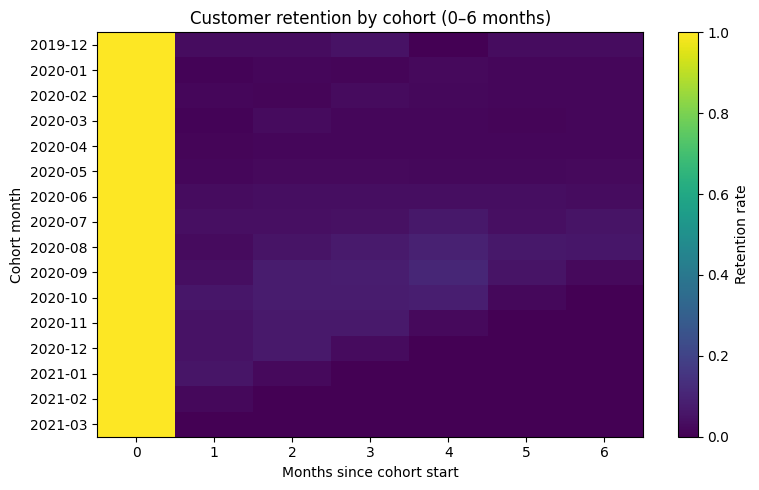

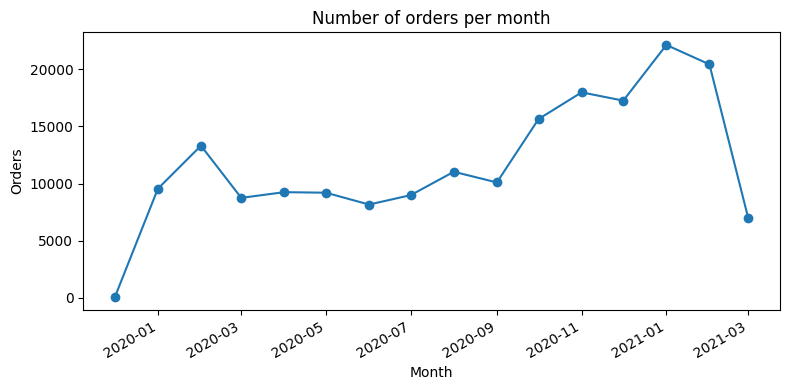

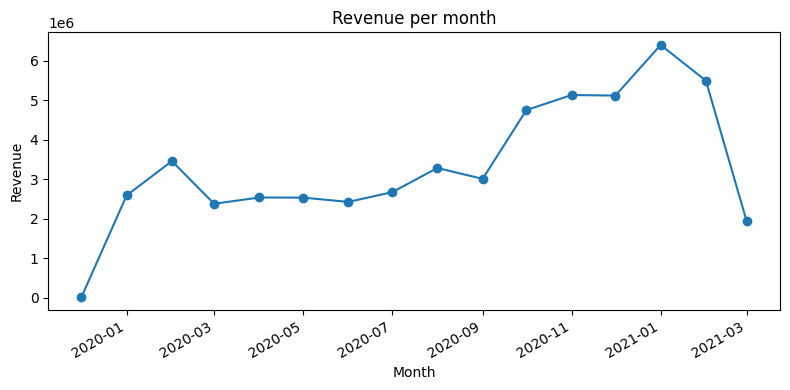

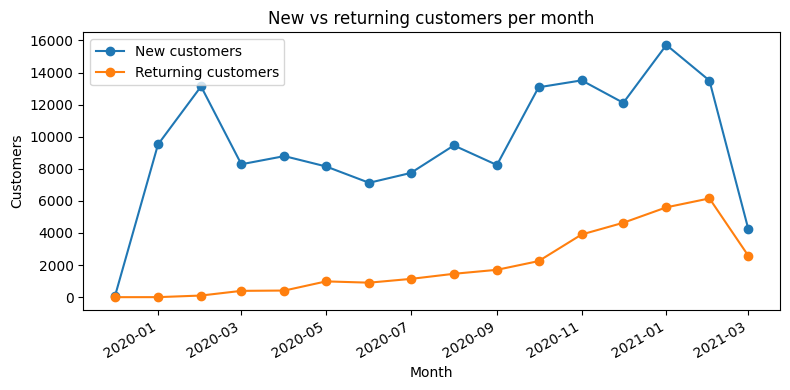

Revenue by product category:
product_category
golf                  31791620.80
multi_sport_bundle    10121472.95
tennis                 7607237.90
accessoires            1731631.62
football               1397055.51
swimming               1111560.24
Name: product_price, dtype: float64


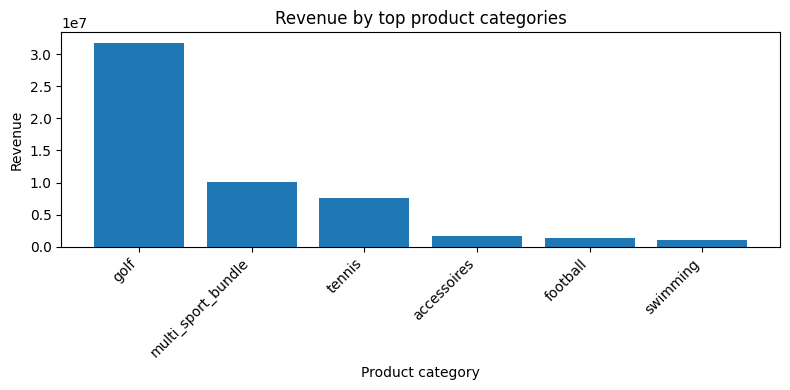

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 1. LOAD DATA
# =========================

# Adjust paths as needed (e.g. './orders_data.csv')
orders = pd.read_csv("/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/orders_data .csv")
products = pd.read_csv("/home/mamunds/job/pyspark/everdrop_data_analyst_case_study/products_data .csv")

# =========================
# 2. PARSE DATES
# =========================

def parse_shopify_ts(s):
    # timestamps look like '2019-12-03 13:08:33 UTC'
    if pd.isna(s):
        return pd.NaT
    return pd.to_datetime(s.replace(" UTC", ""))

orders["processed_at"] = orders["processed_at"].apply(parse_shopify_ts)
orders["created_at"] = orders["created_at"].apply(parse_shopify_ts)
orders["first_date_order"] = orders["first_date_order"].apply(parse_shopify_ts)

# =========================
# 3. REVENUE PER ORDER
# =========================

# Build price map from products table
price_map = products.groupby("product_title")["product_price"].mean().to_dict()

def compute_order_value(items_str):
    if pd.isna(items_str):
        return 0.0
    titles_list = [p.strip() for p in items_str.split(",") if p.strip()]
    return sum(price_map.get(t, 0.0) for t in titles_list)

orders["order_value"] = orders["product_items"].apply(compute_order_value)

# =========================
# 4. COHORT ANALYSIS (Task 2a)
# =========================

# Cohort month = month of first order
orders["cohort_month"] = orders["first_date_order"].values.astype("datetime64[M]")
orders["order_month"] = orders["processed_at"].values.astype("datetime64[M]")

# Months since cohort
orders["period_number"] = (
    (orders["order_month"].dt.year - orders["cohort_month"].dt.year) * 12
    + (orders["order_month"].dt.month - orders["cohort_month"].dt.month)
)

# Cohort sizes (# of customers per cohort)
cohort_sizes = (
    orders.groupby("cohort_month")["customer_id"]
    .nunique()
    .rename("cohort_size")
)

# Active customers per cohort & period
cohort_pivot_counts = (
    orders.groupby(["cohort_month", "period_number"])["customer_id"]
    .nunique()
    .rename("active_customers")
    .reset_index()
    .merge(cohort_sizes.reset_index(), on="cohort_month", how="left")
)

cohort_pivot_counts["retention_rate"] = (
    cohort_pivot_counts["active_customers"] /
    cohort_pivot_counts["cohort_size"]
)

# Retention matrix
cohort_retention_matrix = cohort_pivot_counts.pivot(
    index="cohort_month",
    columns="period_number",
    values="retention_rate"
).sort_index()

# Repurchase rate per cohort: share of customers with >= 2 orders
customer_order_counts = (
    orders.groupby(["cohort_month", "customer_id"])["order_number"]
    .nunique()
    .rename("n_orders")
)

repurchase = (
    customer_order_counts
    .reset_index()
    .assign(repurchase=lambda df: df["n_orders"] > 1)
    .groupby("cohort_month")["repurchase"]
    .mean()
)

print("Repurchase rate per cohort (fraction):")
print(repurchase)

# ----- Cohort heatmap (0–6 months) -----
max_period = 6
retention_0_6 = cohort_retention_matrix.loc[:, 0:max_period]

fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(retention_0_6.fillna(0).values, aspect="auto")

ax.set_xticks(range(retention_0_6.shape[1]))
ax.set_xticklabels(retention_0_6.columns)
ax.set_xlabel("Months since cohort start")

ax.set_yticks(range(retention_0_6.shape[0]))
ax.set_yticklabels([d.strftime("%Y-%m") for d in retention_0_6.index])
ax.set_ylabel("Cohort month")

ax.set_title("Customer retention by cohort (0–6 months)")
plt.colorbar(im, ax=ax, label="Retention rate")
plt.tight_layout()
plt.show()

# =========================
# 5. BUSINESS KPIs (Task 2b)
# =========================

# Monthly KPI aggregation
orders["order_month"] = orders["processed_at"].values.astype("datetime64[M]")

monthly = (
    orders.groupby("order_month")
    .agg(
        n_orders=("order_number", "nunique"),
        revenue=("order_value", "sum"),
        n_customers=("customer_id", "nunique"),
    )
    .reset_index()
)

# Plot: Orders per month
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(monthly["order_month"], monthly["n_orders"], marker="o")
ax.set_title("Number of orders per month")
ax.set_xlabel("Month")
ax.set_ylabel("Orders")
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# Plot: Revenue per month
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(monthly["order_month"], monthly["revenue"], marker="o")
ax.set_title("Revenue per month")
ax.set_xlabel("Month")
ax.set_ylabel("Revenue")
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# =========================
# 6. NEW VS RETURNING CUSTOMERS
# =========================

first_order_per_customer = (
    orders.groupby("customer_id")["processed_at"]
    .min()
    .rename("first_order_date")
)

orders = orders.merge(first_order_per_customer, on="customer_id", how="left")

orders["is_new_customer"] = (
    orders["processed_at"].dt.to_period("M") ==
    orders["first_order_date"].dt.to_period("M")
)

new_returning = (
    orders.groupby(["order_month", "is_new_customer"])["customer_id"]
    .nunique()
    .rename("n_customers")
    .reset_index()
)

pivot_nr = new_returning.pivot(
    index="order_month",
    columns="is_new_customer",
    values="n_customers"
).fillna(0)

pivot_nr.columns = ["returning_customers", "new_customers"]  # False, True

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(pivot_nr.index, pivot_nr["new_customers"], marker="o", label="New customers")
ax.plot(pivot_nr.index, pivot_nr["returning_customers"], marker="o", label="Returning customers")
ax.set_title("New vs returning customers per month")
ax.set_xlabel("Month")
ax.set_ylabel("Customers")
ax.legend()
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# =========================
# 7. REVENUE BY PRODUCT CATEGORY
# =========================

def explode_products(df):
    df = df.copy()
    df["product_title"] = df["product_items"].str.split(",")
    df = df.explode("product_title")
    df["product_title"] = df["product_title"].str.strip()
    return df

orders_exploded = explode_products(orders)

orders_exploded = orders_exploded.merge(
    products[["product_title", "product_category", "product_price"]].drop_duplicates(),
    on="product_title",
    how="left",
)

category_revenue = (
    orders_exploded.groupby("product_category")["product_price"]
    .sum()
    .sort_values(ascending=False)
)

print("Revenue by product category:")
print(category_revenue)

top_cat = category_revenue.head(10)

fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(top_cat.index, top_cat.values)
ax.set_title("Revenue by top product categories")
ax.set_xlabel("Product category")
ax.set_ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
